# Exploratory Data Analysis
 BUSINESS ANALYTICS

Name- Lokesh Kumar

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
store = pd.read_csv("SampleSuperstore.csv")

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
store.shape

(9994, 13)

### Lets check if there are any null values in the dataset

In [8]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values

In [9]:
# Check duplicates
store.duplicated().sum()

17

In [10]:
# Remove duplicates
store.drop_duplicates(subset=None,keep='first',inplace=True)
store.duplicated().sum()

0

In [11]:
# Types of dataset
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

There are 4 types of shipmode, 3 customer segment, 4 different regions and 3 different category

In [12]:
store['Postal Code'] = store['Postal Code'].astype('object')

In [13]:
# Drop the Postal code column
store = store.drop(['Postal Code'],axis = 1)

In [14]:
store.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Lets plot the data

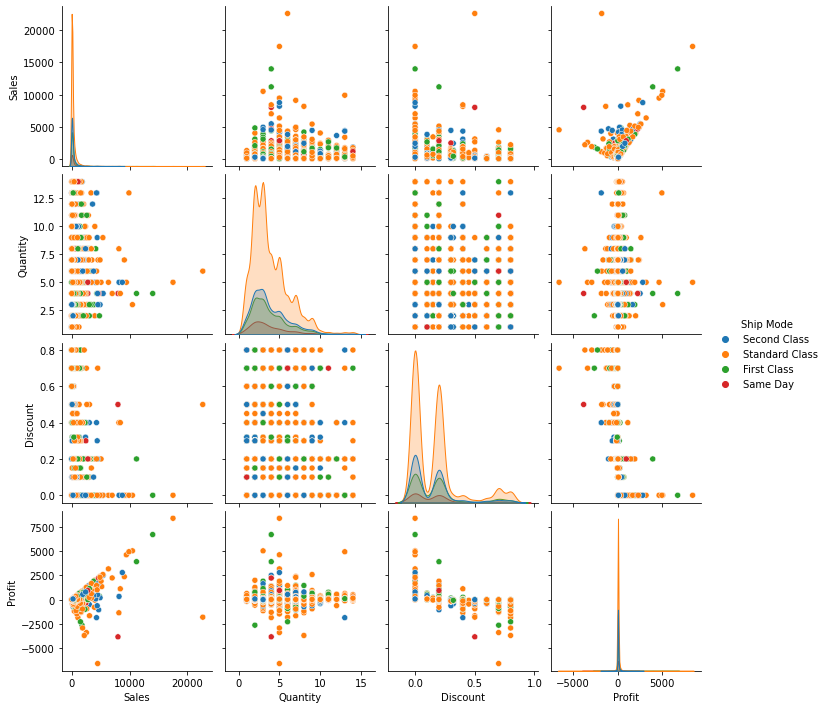

In [15]:
# changes with the shipmode
sns.pairplot(store, hue = 'Ship Mode')

In [16]:
store['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

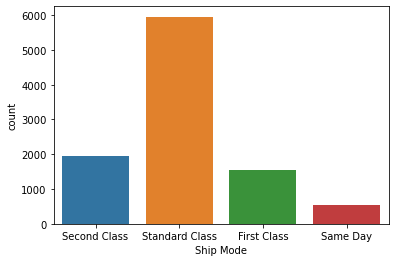

In [17]:
sns.countplot(x=store['Ship Mode'])

<AxesSubplot:>

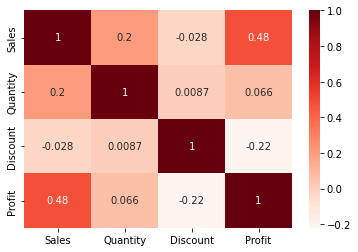

In [18]:
corr = store.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

In [19]:
store['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

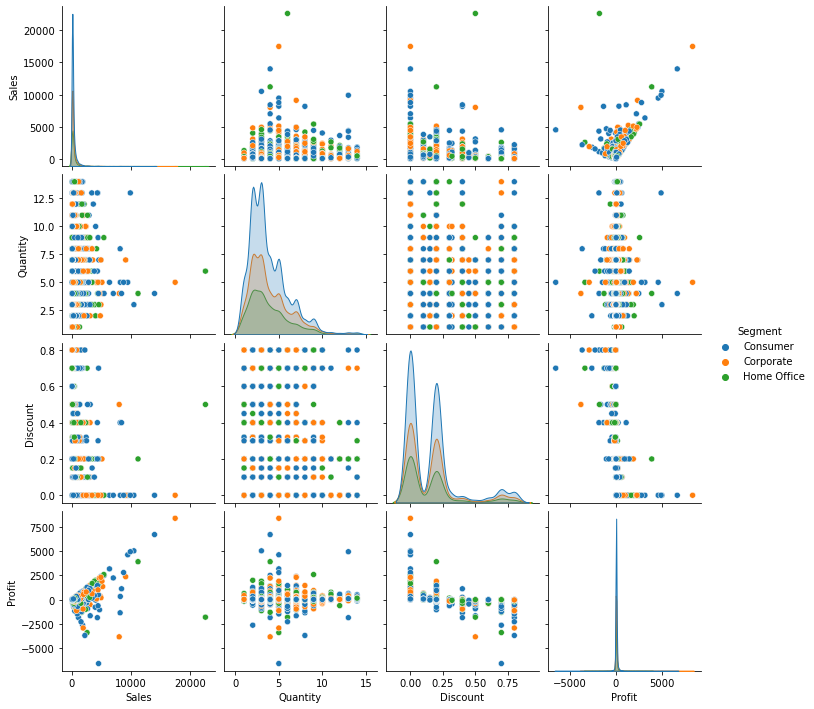

In [20]:
sns.pairplot(store,hue = 'Segment')

<AxesSubplot:xlabel='Segment', ylabel='count'>

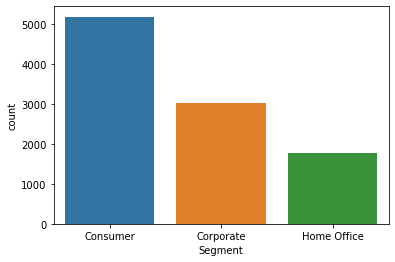

In [21]:
sns.countplot(x= store['Segment'])

In [22]:
store['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

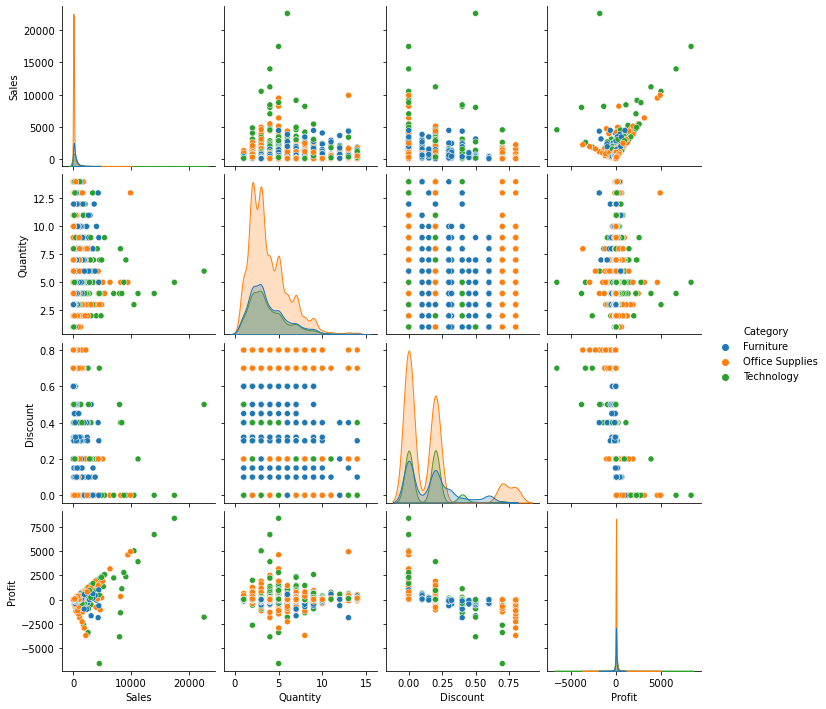

In [23]:
sns.pairplot(store, hue= 'Category')

<AxesSubplot:xlabel='Category', ylabel='count'>

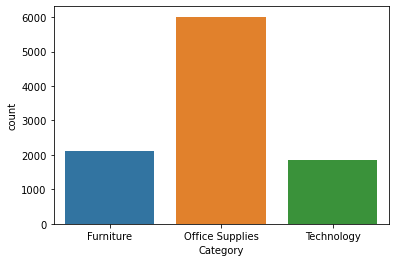

In [24]:
sns.countplot(x= store['Category'])

In [25]:
store['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

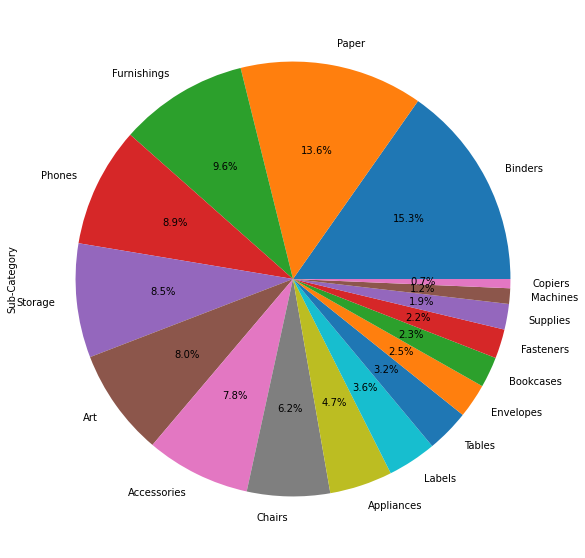

In [42]:
plt.figure(figsize=(10,10))
store['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [27]:
store['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

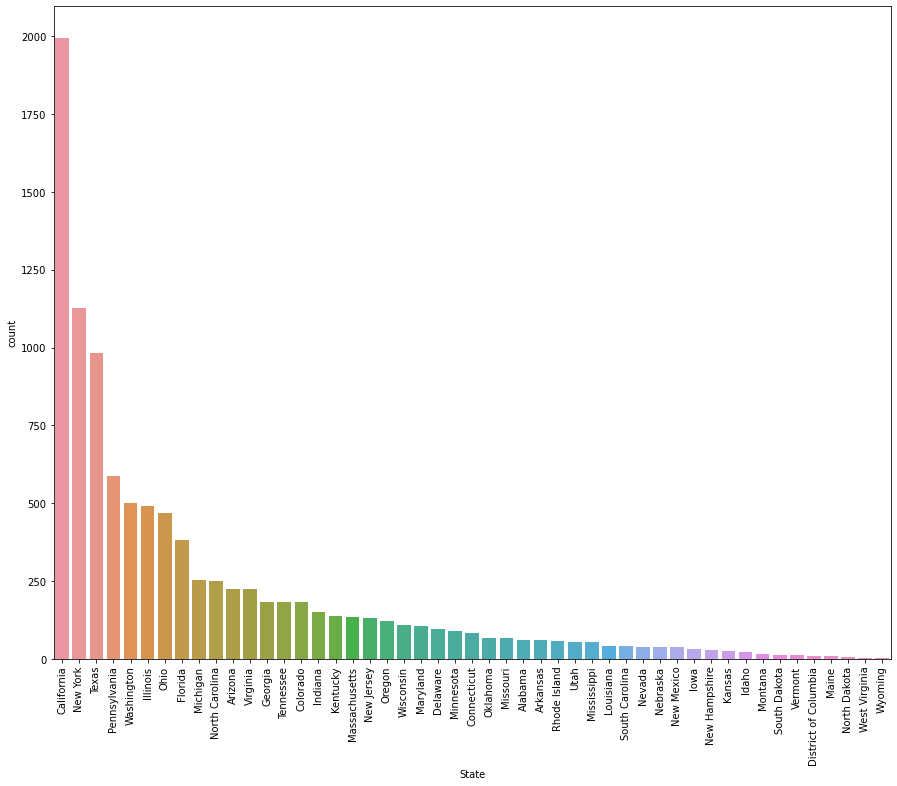

In [28]:
plt.figure(figsize=(15,12))
sns.countplot(x=store['State'],
              order=store['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

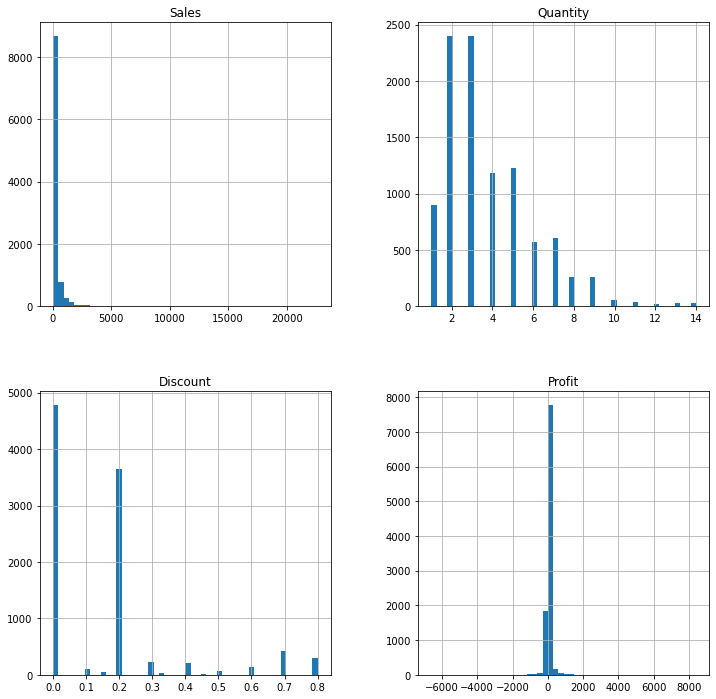

In [29]:
store.hist(figsize=(12,12),bins=50)
plt.show()

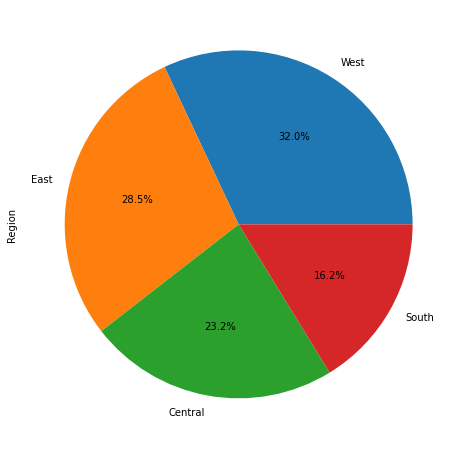

In [30]:
plt.figure(figsize=(8,8))
store['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

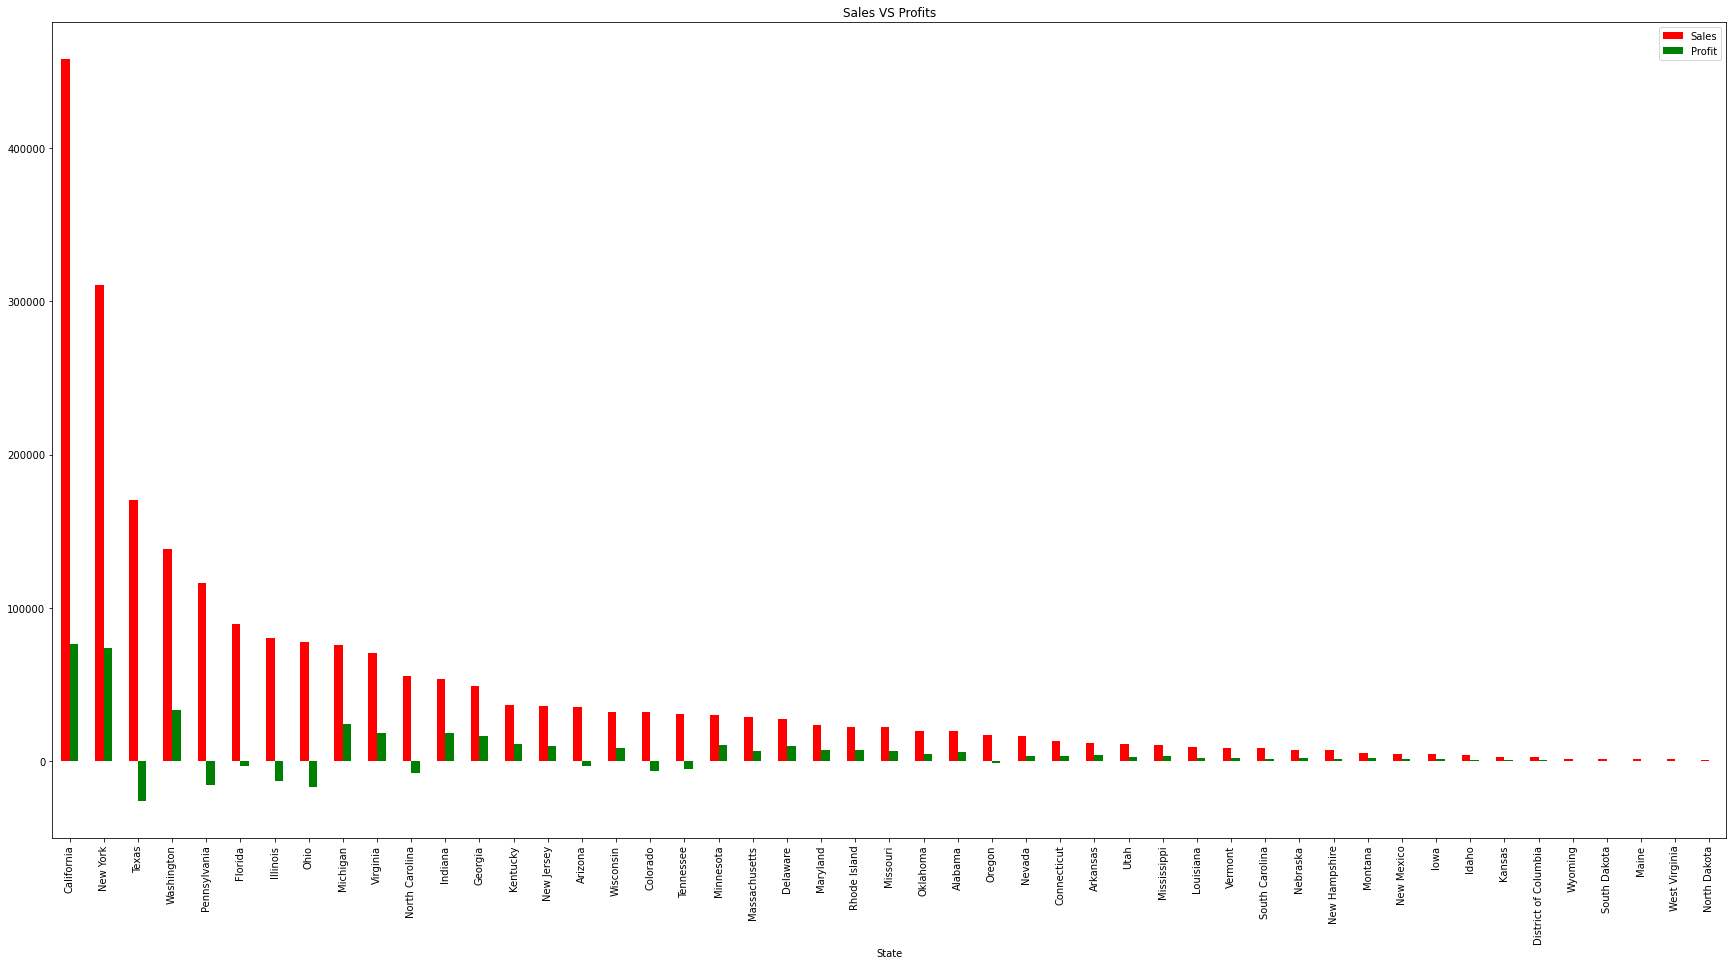

In [31]:
plt.rcParams["figure.figsize"] = [30,15]
store.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["red", "green"])
plt.title("Sales VS Profits")
plt.show()

In [32]:
store.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Idaho                     1.80
Michigan                  1.80
Rhode Island              1.20
Montana                   1.00
Maryland                  0.60
Delaware                  0.60
Connecticut               0.60
New Jersey                0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Nebraska                  0.00
South Dakota              0.00
Wisconsin                 0.00
Arkansas                  0.00
Di

In [33]:
states = store.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70
Florida,89473.7080,-3399.3017,114.65
Illinois,80162.5370,-12601.6500,191.10
Ohio,77976.7640,-16959.3178,152.10
Michigan,75879.6440,24428.0903,1.80


In [34]:
states['Discount'][states['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

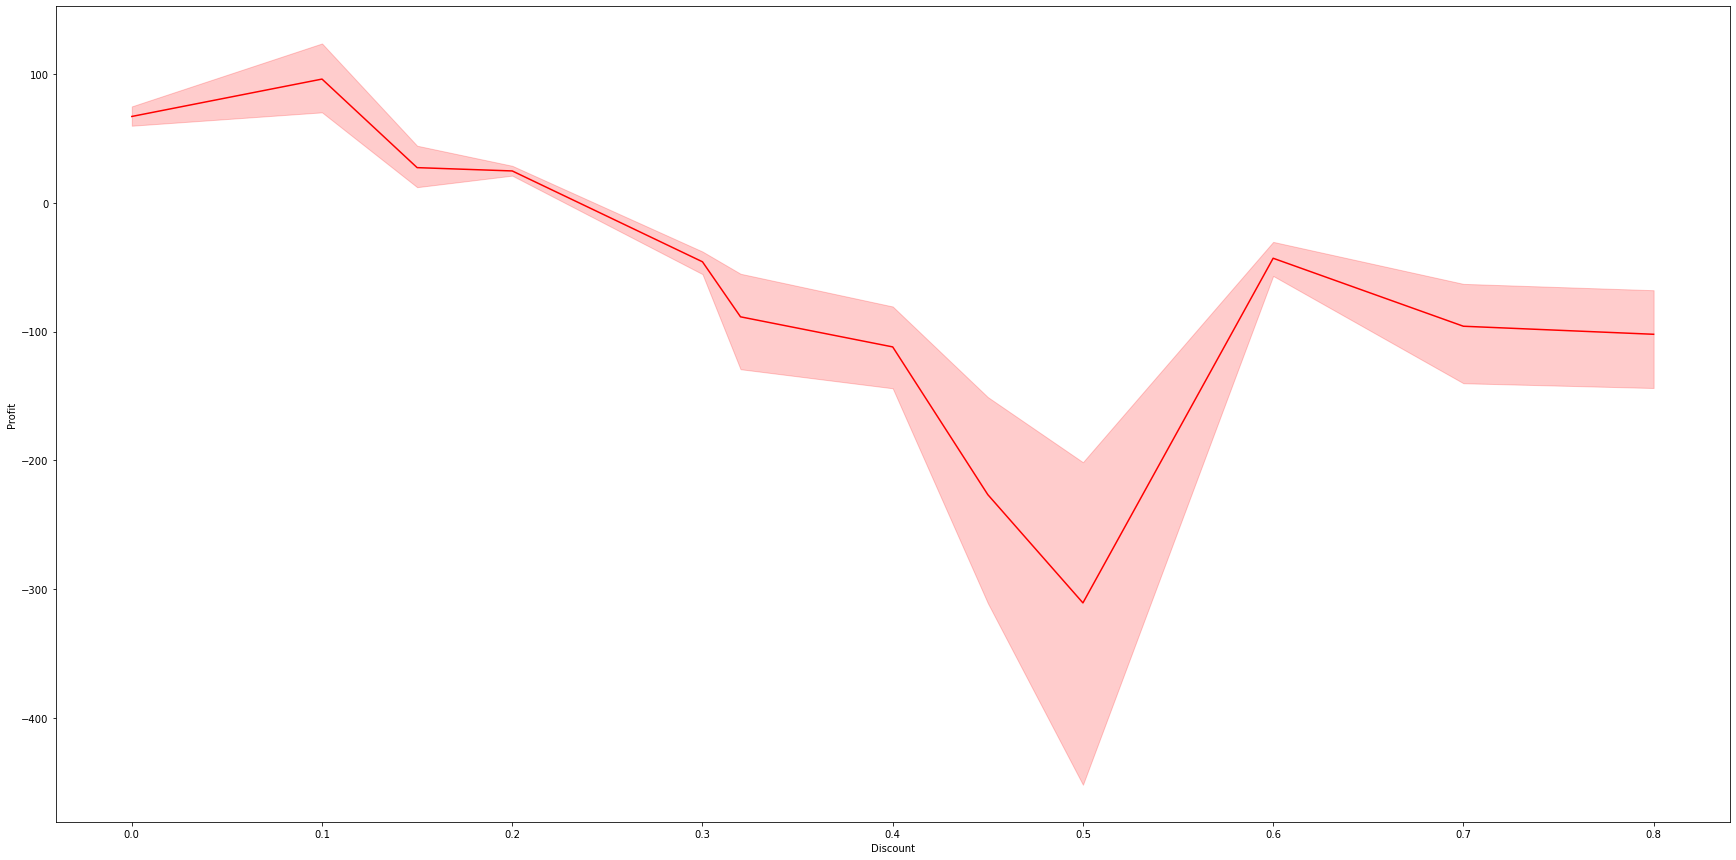

In [35]:
sns.lineplot(x = "Discount", y = "Profit", data = store, color = "red")
plt.show()

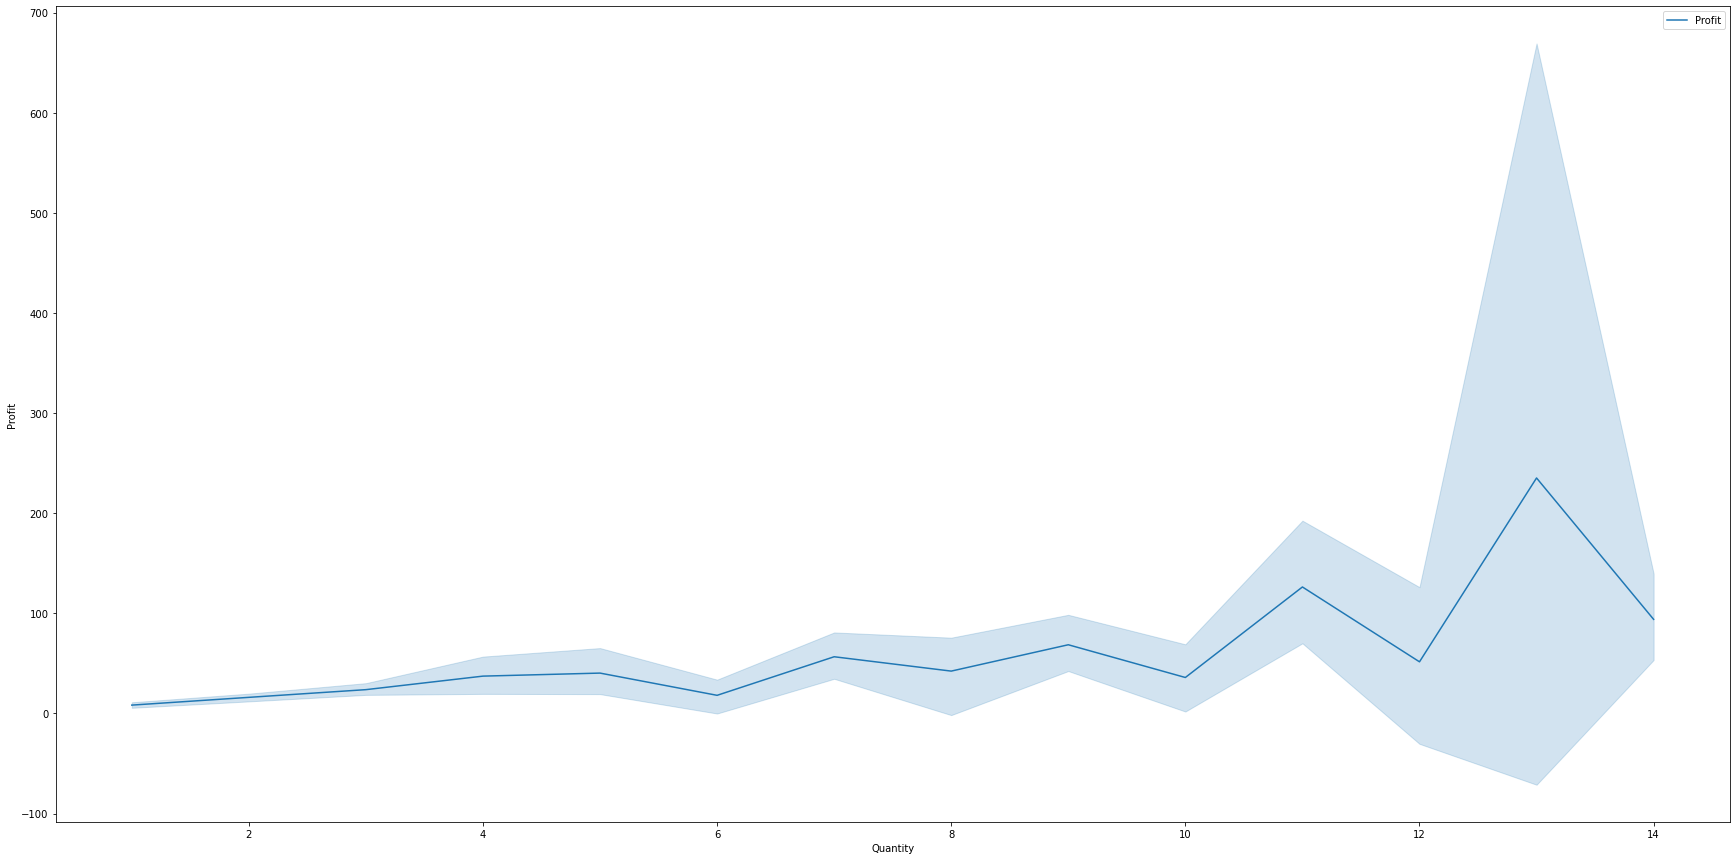

In [36]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=store)
plt.legend()
plt.show()

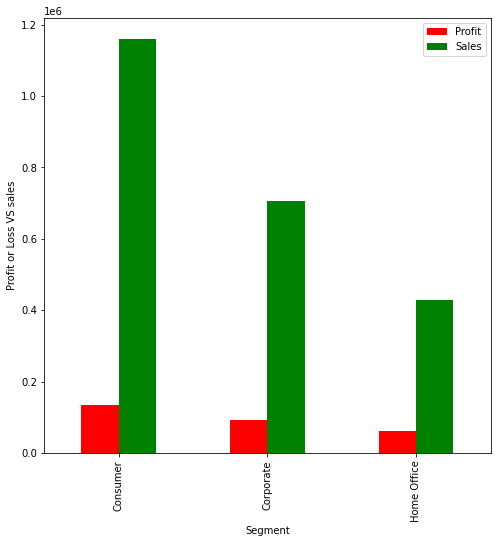

In [37]:
store.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['red','green'],figsize=(8,8))
plt.ylabel('Profit or Loss VS sales')
plt.show()

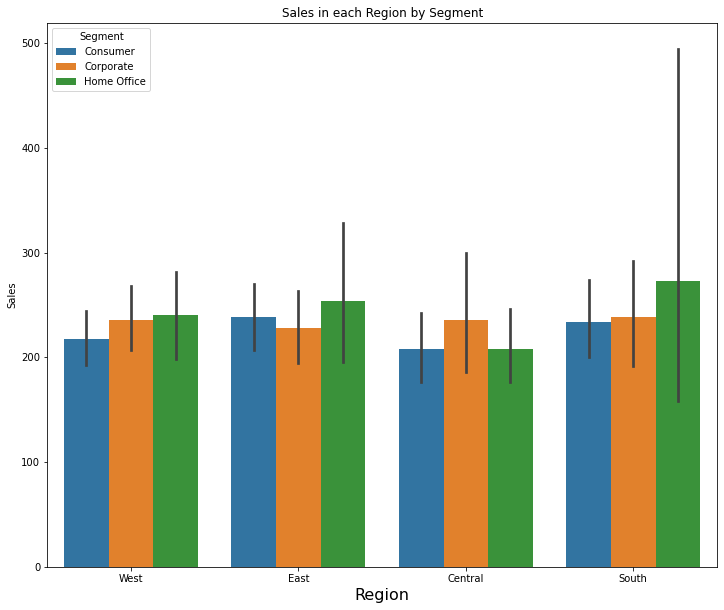

In [38]:
plt.figure(figsize=(12,10))
plt.title('Sales in each Region by Segment')
sns.barplot(x='Region',y='Sales',data=store,hue='Segment',order=store['Region'].value_counts().index)
plt.xlabel('Region',fontsize=16)
plt.show()

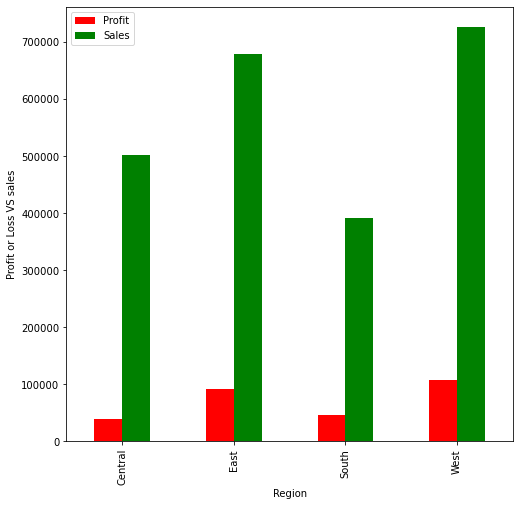

In [39]:
store.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['red','green'],figsize=(8,8))
plt.ylabel('Profit or Loss VS sales')
plt.show()

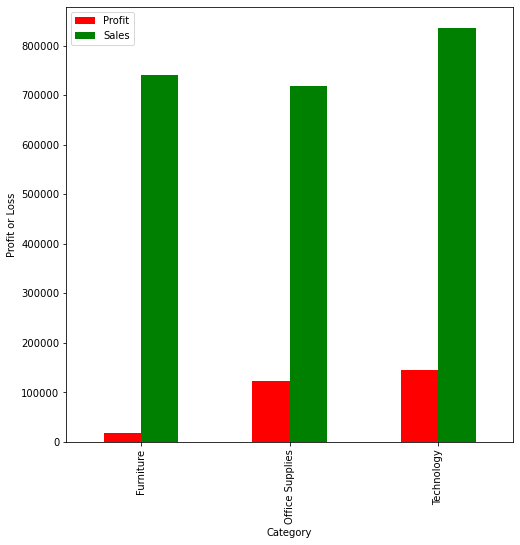

In [40]:
store.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['red','green'],figsize=(8,8))
plt.ylabel('Profit or Loss')
plt.show()

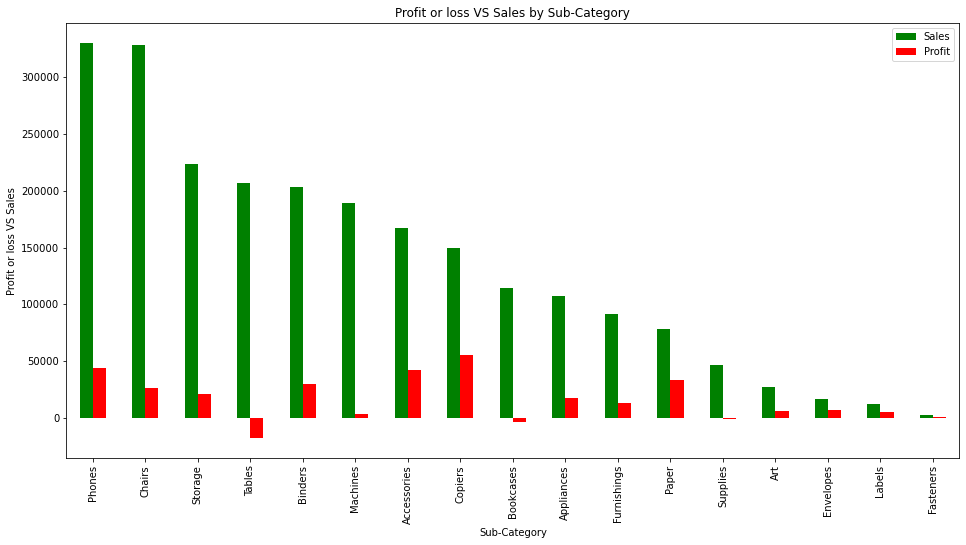

In [41]:
pl = store.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pl[:].plot.bar(color=['green','red'],figsize=(16,8))
plt.title('Profit or loss VS Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit or loss VS Sales')
plt.show()